# Employee Exit Surveys

In this project, we wil work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

Below is a preview of a couple columns in the dete_survey.csv dataset downloaded from https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey:

|Column | Explanation|
| -----| --------|
| ID | An id used to identify the participant of the survey |
| SeparationType|  The reason why the person's employment ended | 
| Cease Date|  The year or month the person's employment ended | 
| DETE Start Date| The year the person began employment with the DETE| 

Below is a preview of a couple columns in the tafe_survey.csv.csv dataset downloaded from https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey:

| Column | Explanation |
| -------| ----------- |
| Record ID | An id used to identify the participant of the survey
| Reason for ceasing employment | The reason why the person's employment ended
| LengthofServiceOverall.Overall Length of Service at Institute (in years) | The length of the person's employment (in years) |

The purpose of this project is to find out:
1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [1]:
# read dataset into pandas

import pandas as pd
import numpy as np

dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

In [2]:
# exploration of the data
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [3]:
print("Number of missing values in dete_survey:")
dete_survey.isnull().sum()

Number of missing values in dete_survey:


ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [4]:
# exploration of the data
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [5]:
print("Number of missing values in tafe_survey:")
tafe_survey.isnull().sum()

Number of missing values in tafe_survey:


Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

Below is the first four rows of both datasets:

In [6]:
print("dete_survey:")
print("\n")
dete_survey.head()

dete_survey:




,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [7]:
print("tafe_survey:")
print("\n")
dete_survey.head()

tafe_survey:




,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


#### 1. Drop and Rename columns

Observations on the dataset:

- The dete_survey dataframe contains "Not Stated" values that indicate values are missing, but they are not represented as NaN
- Both the dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis
- Each dataframe contains many of the same columns, but the column names are different
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied

In [8]:
# change "Not Stated" values to NaN
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [9]:
# drop unuseful columns
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [10]:
print("Updated columns in dete_survey.csv:")
print(dete_survey_updated.columns)
print("\n")
print("Updated columns in tafe_survey.csv:")
print(tafe_survey_updated.columns)

Updated columns in dete_survey.csv:
Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')


Updated columns in tafe_survey.csv:
Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contr

Each dataframe contains many of the same columns, but the column names are different:

|dete_survey |tafe_survey	|Definition|
|-----------| ---------------| ---------|
|ID	|Record ID	| An id used to identify the participant of the survey|
|SeparationType	| Reason for ceasing employment| The reason why the participant's employment ended|
|Cease Date	|CESSATION YEAR | The year or month the participant's employment ended|
|DETE Start Date |		| The year the participant began employment with the DETE|
|   | LengthofServiceOverall. Overall Length of Service at Institute (in years)| The length of the person's employment (in years) |
| Age	|CurrentAge. Current Age| The age of the participant|
|Gender	|Gender. What is your Gender? |The gender of the participant|

In [11]:
# standardize column names

# dete_survey.csv

# lower case
# remove any trailing whitespace from the end of the strings
# replace spaces with underscores
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(" ", "_").str.strip().str.lower()

print("Updated column names in dete_survey.csv:")
dete_survey_updated.columns

Updated column names in dete_survey.csv:


Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [12]:
# tafe_survey.csv

mappings = {"Record ID": "id", "CESSATION YEAR": "cease_date",
            "Reason for ceasing employment": "separationtype",
            "Gender. What is your Gender?": "gender",
            "CurrentAge. Current Age": "age",
            "Employment Type. Employment Type": "employment_status",
            "Classification. Classification": "position",
            "LengthofServiceOverall. Overall Length of Service at Institute (in years)": "institute_service",
            "LengthofServiceCurrent. Length of Service at current workplace (in years)": "role_service"}

tafe_survey_updated = tafe_survey_updated.rename(mappings, axis = 1)

print("Updated column names in tafe_survey.csv:")
tafe_survey_updated.columns


Updated column names in tafe_survey.csv:


Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [13]:
print("The first four rows of the dete_survey dataset:")
dete_survey_updated.head()

The first four rows of the dete_survey dataset:


,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [14]:
print("The first four rows of the tafe_survey dataset:")
tafe_survey_updated.head()

The first four rows of the tafe_survey dataset:


,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


#### 2. Identify Missing Values

For this project, we are analysing survey respondents who resigned, so their separation type contains the string 'Resignation'. The dete_survey_updated dataframe contains multiple separation types with the string 'Resignation':

- Resignation-Other reasons
- Resignation-Other employer
- Resignation-Move overseas/interstate

In [15]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [16]:
# dete_survey_updated dataframe contains three Resignation separation types
# select all data where "separationtype" contains "Registration"
dete_survey_updated["separationtype"] = dete_survey_updated["separationtype"].str.split('-').str[0]

# Check the values in the separationtype column were updated correctly
dete_survey_updated["separationtype"].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [17]:
tafe_survey_updated["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

#### 3. Verify Values

#### 3.1 Cease Date

In [18]:
# Select only the resignation separation types from each dataframe
# reference: https://www.dataquest.io/blog/settingwithcopywarning/
dete_resignations = dete_survey_updated[dete_survey_updated["separationtype"] == 'Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated["separationtype"] == 'Resignation'].copy()

In [19]:
# Check the unique values
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
09/2010      1
07/2006      1
07/2012      1
Name: cease_date, dtype: int64

In [20]:
# Check the unique values
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.split('/').str[-1]
dete_resignations["cease_date"] = dete_resignations["cease_date"].astype("float")

dete_resignations["cease_date"].value_counts().sort_values(ascending=False)

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# to avoid cease date showing absolute values
plt.rcParams['axes.formatter.useoffset'] = False

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



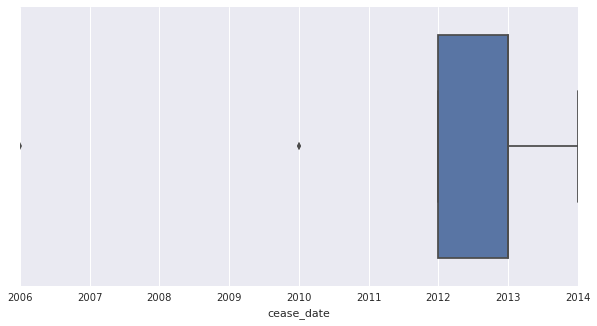

In [22]:
fig = plt.figure(figsize=(10,5))
sns.despine(left=True, bottom=True)
ax_dete_resignations = sns.boxplot(dete_resignations["cease_date"])

In [23]:
tafe_resignations["cease_date"].value_counts().sort_values(ascending=False)

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



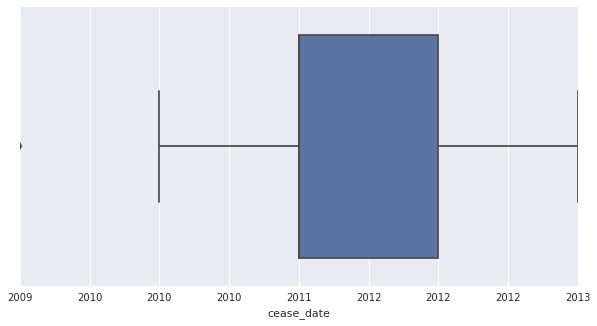

In [24]:
fig = plt.figure(figsize=(10,5))
sns.despine(left=True, bottom=True)
ax_tafe_resignations = sns.boxplot(tafe_resignations["cease_date"])

from matplotlib.ticker import FuncFormatter

# tick formatters
# present data in 0 decimal places
# reference: https://matplotlib.org/3.1.1/gallery/ticks_and_spines/tick-formatters.html
ax_tafe_resignations.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: "%.0f" % x)) 

plt.show()

#### 3.2 Dete Start Date

In [25]:
dete_resignations['dete_start_date'].value_counts().sort_values()

1963.0     1
1971.0     1
1972.0     1
1984.0     1
1977.0     1
1987.0     1
1975.0     1
1973.0     1
1982.0     1
1974.0     2
1983.0     2
1976.0     2
1986.0     3
1985.0     3
2001.0     3
1995.0     4
1988.0     4
1989.0     4
1991.0     4
1997.0     5
1980.0     5
1993.0     5
1990.0     5
1994.0     6
2003.0     6
1998.0     6
1992.0     6
2002.0     6
1996.0     6
1999.0     8
2000.0     9
2013.0    10
2009.0    13
2006.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



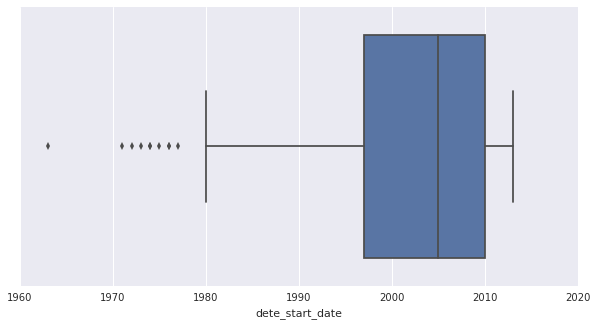

In [26]:
fig = plt.figure(figsize=(10,5))
sns.despine(left=True, bottom=True)
ax_dete_start_date = sns.boxplot(dete_resignations["dete_start_date"])

#### 4. Create New Column

One of the purpose of this study is to find out if employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction. The length of time an employee spent in a workplace is referred to as their years of service.

The tafe_resignations dataframe already contains a "service" column, which we renamed to institute_service.

dete_resignations:

In [27]:
dete_resignations.head(1)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN


tafe_resignations:

In [28]:
tafe_resignations.head(1)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN


To analyze both surveys, a corresponding institute_service column in dete_resignations has to be created.

Calculation for the "institute_service" column is by subtracting the dete_start_date from the cease_date:

In [29]:
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]

In [30]:
dete_resignations.head(1)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0


#### 5. Identify Dissatisfied Employees

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe. 

tafe_survey_updated:
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction

dete_survey_updated:
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column. After the changes, the new dissatisfied column will contain just the following values:

- True: indicates a person resigned because they were dissatisfied with the job
- False: indicates a person resigned because of a reason other than dissatisfaction with the job
- NaN: indicates the value is missing

In [31]:
# view the values in the "Contributing Factors. Dissatisfaction"
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [32]:
# view the values in the "Contributing Factors. Job Dissatisfaction"
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [33]:
# update the values to show only True, False, or NaN values

# the df.any() method is used to create a dissatisfied column in BOTH the tafe_resignations and dete_resignations dataframes
dete_columns = ["job_dissatisfaction", "dissatisfaction_with_the_department", "physical_work_environment", "lack_of_recognition", "lack_of_job_security", "work_location", "employment_conditions", "work_life_balance", "workload"]

# dete_columns are already showing only True, False, or NaN values
# update_vals(val) is not needed
dete_resignations["dissatisfied"] = dete_resignations[dete_columns].any(1, skipna=False)

# applymap method reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.applymap.html
# applymap is a function that accepts and returns a scalar to every element of a DataFrame

# write a new function to update the values
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == "-":
        return False
    else:
        return True

tafe_resignations["dissatisfied"] = tafe_resignations[["Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction"]].applymap(update_vals).any(1, skipna=False)

# use df.copy() to create a copy of the results and avoid the SettingWithCopy Warning
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

In [34]:
dete_resignations_up["dissatisfied"].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [35]:
tafe_resignations_up["dissatisfied"].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

#### 6. Combine Datasets

In [36]:
# add a column to each dataframe to easily distinguish between the two

# add a column named institute to dete_resignations_up
dete_resignations_up["institute"] = "DETE"

# add a column named institute to tafe_resignations_up
tafe_resignations_up["institute"] = "TAFE"

# combine the dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

In [37]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 53 columns):
Contributing Factors. Career Move - Private Sector     332 non-null object
Contributing Factors. Career Move - Public Sector      332 non-null object
Contributing Factors. Career Move - Self-employment    332 non-null object
Contributing Factors. Dissatisfaction                  332 non-null object
Contributing Factors. Ill Health                       332 non-null object
Contributing Factors. Interpersonal Conflict           332 non-null object
Contributing Factors. Job Dissatisfaction              332 non-null object
Contributing Factors. Maternity/Family                 332 non-null object
Contributing Factors. NONE                             332 non-null object
Contributing Factors. Other                            332 non-null object
Contributing Factors. Study                            332 non-null object
Contributing Factors. Travel                           332 non-null ob

In [38]:
# drop columns with less than 500 non null values
combined_updated = combined.dropna(thresh=500, axis=1).copy()

In [39]:
combined_updated.head()

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
0,36-40,2012.0,False,Permanent Full-time,Female,4.0,DETE,7,Teacher,Resignation
1,41-45,2012.0,True,Permanent Full-time,Female,6.0,DETE,18,Guidance Officer,Resignation
2,31-35,2012.0,False,Permanent Full-time,Female,9.0,DETE,3,Teacher,Resignation
3,46-50,2012.0,True,Permanent Part-time,Female,10.0,DETE,15,Teacher Aide,Resignation
4,31-35,2012.0,False,Permanent Full-time,Male,12.0,DETE,3,Teacher,Resignation


There are 651 entries in the combined dataframe. Columns with less than 500 non null values are dropped since columns with more than 75% of null values in the particular column are not useful for analysis:

In [40]:
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
age                  596 non-null object
cease_date           635 non-null float64
dissatisfied         643 non-null object
employment_status    597 non-null object
gender               592 non-null object
id                   651 non-null float64
institute            651 non-null object
institute_service    563 non-null object
position             598 non-null object
separationtype       651 non-null object
dtypes: float64(2), object(8)
memory usage: 50.9+ KB


#### 7. Clean columns

"institute_service" column:

This column contains  values in a couple different forms.

In [41]:
combined_updated["institute_service"].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
21.0                   3
39.0                   3
30.0                   2
25.0                   2
26.0                   2
28.0                   2
36.0                   2


To analyze the data, the numbers will be converted to categories with definitions below:

| Career Stages | Definition|
|---|-----------------------------|
|New| Less than 3 years at a company|
|Experienced| 3-6 years at a company|
|Established| 7-10 years at a company|
|Veteran| 11 or more years at a company|

In [42]:
# reference: https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#extracting-substrings
# reference: https://docs.python.org/3/library/re.html

# str.extract = extract substrings

# + : Causes the resulting RE to match 1 or more repetitions of the preceding RE
# \d : extract digits
combined_updated["institute_service_new"] = combined_updated["institute_service"].astype("str").str.extract(r'(\d+)')
combined_updated["institute_service_new"] = combined_updated["institute_service_new"].astype("float")

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:8: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



In [43]:
combined_updated["institute_service_new"].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_new, dtype: int64

In [44]:
# create a function that maps each year value to the career stages
def career_mapping(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return "New"
    elif 3 <= val <= 6:
        return "Experienced"
    elif 7 <= val <= 10:
        return "Established"
    elif val >= 11:
        return "Veteran"
    
combined_updated["service_cat"] = combined_updated["institute_service_new"].apply(career_mapping)

In [45]:
combined_updated["service_cat"].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

#### 8. Analysis and Conclusion

In [46]:
# confirm the number of True and False in dissatisfied
# identified dissatisfied employees in part 5

combined_updated["dissatisfied"].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

Replace the missing values in the dissatisfied column with the value that occurs most frequently in this column - False:

In [47]:
combined_updated["dissatisfied"] = combined_updated["dissatisfied"].fillna(False)
combined_updated["dissatisfied"].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

Calculate the percentage of dissatisfied employees in each service_cat group:

In [48]:
# reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html
combined_pivot_table = combined_updated.pivot_table(index = "service_cat", values = "dissatisfied")

In [49]:
combined_pivot_table

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


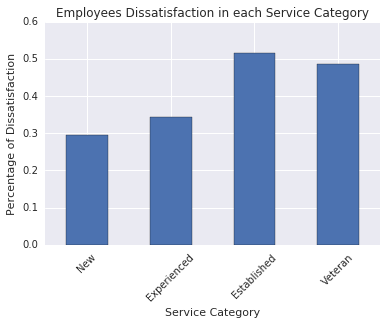

In [50]:
%matplotlib inline

# order by career stages AESC
order = ["New", "Experienced", "Established", "Veteran"]

combined_pivot_table.loc[order].plot(kind="bar", rot=45, title="Employees Dissatisfaction in each Service Category", legend=None)
plt.xlabel("Service Category")
plt.ylabel("Percentage of Dissatisfaction")

Employees with 7 or more years of service are more likely to resign due to job dissatisfaction compared with employees with less than 7 years of service.

| Career Stages | Definition|
|---|-----------------------------|
|New| Less than 3 years at a company|
|Experienced| 3-6 years at a company|
|Established| 7-10 years at a company|
|Veteran| 11 or more years at a company|